# Acquire Data

In [818]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import explore
from env import host, username, password
import acquire

In [819]:
# Get connection url using get_connection function from acquire
url = acquire.get_connection('telco_churn')

In [820]:
# Acquire Telco data from Codeup SQL database using acquire.telco_data function
telco_df = acquire.telco_data()

In [821]:
# Rough telco_df import
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


***
Observations:
* Drop Columns (redundant): ['customer_id']
* Binary Conversions: ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn']
    * gender will have to be converted to is_male 
* Reference Data to leave in original df but leave out of Train data (note: numeric data in separate column): ['contract_type', 'internet_service_type', 'payment_type']    
* Assumptive manipulation --> following columns contain data (No Internet & No phone service) that may be valuable to explore how this extra feature subset impacts behavior of separate feature but for purposes of initial review I will convert to binary: ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
***

In [822]:
# DF info summary stats
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

***
### info() summary:
* 6 numerical & 17 categorical dtypes
* 0 "na" and 0 'null' values 
* numerics- 1 float and 5 int dtypes

NOTE: total_charges in str format (need to convert to continuous numeric)
***

In [823]:
# Describe (assumption: all numerical/continues data included)
telco_df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


***
### describe() summary:
* Continuous values: ['tenure', 'monthly_charges']
* Categorical numerical values: ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen']
***    

Text(0.5, 1.0, "Number of 'na' in telco_df")

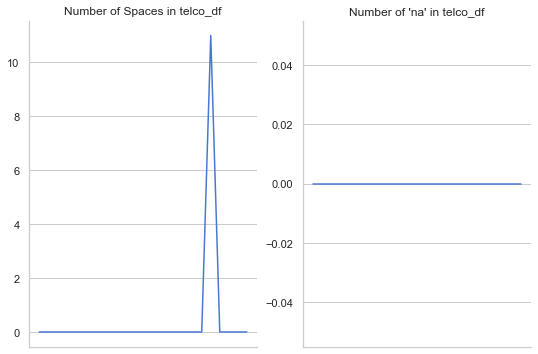

In [1040]:
# investigate the telco_df data further to see if any categorical dtypes contain, na, empty or blank values
# Visualize the 'na' and ' ' first
plt.subplot(1, 2, 1)
plt.plot((telco_df==' ').sum())
plt.xticks([])
plt.title("Number of Spaces in telco_df")

plt.subplot(1, 2, 2)
plt.plot((telco_df=='na').sum())
plt.xticks([])
plt.title("Number of 'na' in telco_df")

In [825]:
# Visualizations show 0 categorical dtype contain 'na' and one contains  ' '.
# Use a sum of booleans to identify which feature contains ' ' and how many
print((telco_df == ' ').sum())

payment_type_id              0
internet_service_type_id     0
contract_type_id             0
customer_id                  0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
paperless_billing            0
monthly_charges              0
total_charges               11
churn                        0
contract_type                0
internet_service_type        0
payment_type                 0
dtype: int64


***
NOTE: Will have to decide during Data Preparation how to address the 11 empty string values for total_charges 
***

In [826]:
# List quant_vars & cat_vars
quant_vars = ['tenure', 'monthly_charges', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen']
cat_vars = ['customer_id', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'churn', 'contract_type', 'internet_service_type', 'payment_type']

# Data Preparation

In [827]:
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

#### Prep data on observations made during Acquire stage

In [828]:
# Drop redundant column and begin prepping data set
prep_df = telco_df.drop(columns=['customer_id'])

In [829]:
# After running into an issue below, I decided to convert the total_charges spaces to a zero at this point. 
prep_df['total_charges'] = prep_df['total_charges'].replace(' ', 0)

#Also ran a value counts to make sure I now have 11 zeros instead of empty values.
prep_df['total_charges'].value_counts()

0          11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
860.85      1
1533.8      1
168.6       1
3734.25     1
4245.55     1
Name: total_charges, Length: 6531, dtype: int64

In [830]:
# Convert total_charges from a str to a float
prep_df['total_charges'] = prep_df['total_charges'].astype(float)

NOTE: Received an error here initially and after investigation, the empty entries created the issue  After revewing the data, the empty values are direclty associated with new contracts, so to address this issue, I decided to enter an amount of 0 for these entries as it appears they have not gone through a bililng cycle and therefore have no cumulative charges to show. Addressed this in previous cell.

In [831]:
# Drop columns with reference data
prep_df = prep_df.drop(columns=['contract_type', 'internet_service_type', 'payment_type'])

In [832]:
# Control check on the dtypes of my prep_df at this point
prep_df.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges               float64
churn                        object
dtype: object

In [833]:
# Now that I'm ready to convert Yes/No to 1/0 across entire df, taking a value_counts snapshot of my prep_df at this point as a control for later potential reference
columns = ['tenure', 'monthly_charges', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'churn']
for col in columns:
    print(prep_df[col].value_counts())
    print('**********************')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********************
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
92.65      1
109.85     1
35.70      1
61.95      1
Name: monthly_charges, Length: 1585, dtype: int64
**********************
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
**********************
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
**********************
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
**********************
0    5901
1    1142
Name: senior_citizen, dtype: int64
**********************
Male      3555
Female    3488
Name: gender, dtype: int64
**********************
No     3641
Yes    3402
Name: partner, dtype: int64
**********************
No     4933
Yes    2110
Name: dependents, dtype: int64
**********************
Yes    6361
No

In [834]:
# Replace Yes/No entries with 1/0 across entire df
prep_df = prep_df.replace({'Yes':1, 'No':0})

In [835]:
# Check to make sure replace was successful.  NOTE: language containing No was not replaced, need to address in next step
columns = ['tenure', 'monthly_charges', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'churn']
for col in columns:
    print(prep_df[col].value_counts())
    print('**********************')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********************
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
92.65      1
109.85     1
35.70      1
61.95      1
Name: monthly_charges, Length: 1585, dtype: int64
**********************
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
**********************
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
**********************
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
**********************
0    5901
1    1142
Name: senior_citizen, dtype: int64
**********************
Male      3555
Female    3488
Name: gender, dtype: int64
**********************
0    3641
1    3402
Name: partner, dtype: int64
**********************
0    4933
1    2110
Name: dependents, dtype: int64
**********************
1    6361
0     682
Na

In [836]:
# Assumptive Manipulation: conversion of non-service to a 'No'
prep_df = prep_df.replace({'No internet service':0, 'No phone service':0})

# check update via value counts
columns = ['tenure', 'monthly_charges', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'churn']
for col in columns:
    print(prep_df[col].value_counts())
    print('**********************')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********************
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
92.65      1
109.85     1
35.70      1
61.95      1
Name: monthly_charges, Length: 1585, dtype: int64
**********************
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
**********************
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
**********************
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
**********************
0    5901
1    1142
Name: senior_citizen, dtype: int64
**********************
Male      3555
Female    3488
Name: gender, dtype: int64
**********************
0    3641
1    3402
Name: partner, dtype: int64
**********************
0    4933
1    2110
Name: dependents, dtype: int64
**********************
1    6361
0     682
Na

In [837]:
# Final data prep steps: 
# convert the gender column to is_male and male/female strings to 1/0 values
prep_df = prep_df.rename(columns={'gender': 'is_male'})

# replace male/female with 1/0
prep_df = prep_df.replace({'Male':1, 'Female':0})

# Check
prep_df.head(100)

,payment_type_id,internet_service_type_id,contract_type_id,is_male,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,2,1,3,0,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.90,0
1,4,1,3,1,0,0,0,54,0,0,1,0,0,1,1,0,0,45.20,2460.55,0
2,3,1,3,0,0,0,0,56,0,0,1,1,1,1,0,0,0,45.05,2560.10,0
3,4,1,3,1,0,1,1,20,0,0,1,0,1,1,0,0,1,39.40,825.40,0
4,3,1,3,1,0,1,0,72,1,1,0,1,1,1,1,1,1,85.15,6316.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,3,1,0,0,0,60,1,0,1,1,1,0,0,0,0,61.40,3638.25,0
96,3,1,3,1,0,1,1,45,1,0,1,0,0,1,0,0,0,54.65,2553.70,0
97,4,1,3,1,0,1,1,72,1,1,1,1,1,1,1,1,0,89.85,6562.90,0
98,2,1,3,1,0,1,1,72,0,0,1,0,1,1,1,0,0,48.90,3527.00,0


In [838]:
# final control check
columns = ['tenure', 'monthly_charges', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'is_male', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'churn']
for col in columns:
    print(prep_df[col].value_counts())
    print('**********************')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**********************
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
92.65      1
109.85     1
35.70      1
61.95      1
Name: monthly_charges, Length: 1585, dtype: int64
**********************
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
**********************
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
**********************
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
**********************
0    5901
1    1142
Name: senior_citizen, dtype: int64
**********************
1    3555
0    3488
Name: is_male, dtype: int64
**********************
0    3641
1    3402
Name: partner, dtype: int64
**********************
0    4933
1    2110
Name: dependents, dtype: int64
**********************
1    6361
0     682
Name: phone

***
##### Now that final control is passed, create function to iterate Data Preparation steps
***

***
`def prep_df(df)`:
    
    # Drop redundant data column 
    prep_df = telco_df.drop(columns=['customer_id'])
    
    # convert the total_charges spaces to zeros  
    prep_df['total_charges'] = prep_df['total_charges'].replace(' ',0)
    
    # Convert total_charges from a str to a float
    prep_df['total_charges'] = prep_df['total_charges'].astype(float)
    
    # Drop columns with reference data
    prep_df = prep_df.drop(columns=['contract_type', 
    'internet_service_type', 'payment_type'])
    
    # Replace Yes/No entries with 1/0 across entire df
    prep_df = prep_df.replace({'Yes':1, 'No':0})
    
    # Assumptive Manipulation: conversion of non-service to a 0 
    prep_df = prep_df.replace({'No internet service':0, 'No phone service':0})
    
    # convert the gender column to is_male and male/female strings to 1/0 values
    prep_df = prep_df.rename(columns={'gender': 'is_male'})

    # replace male/female with 1/0
    prep_df = prep_df.replace({'Male':1, 'Female':0})
    
    return prep_df 
***

***
#### Split the Data: Train, Validate & Test
***

In [839]:
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own modules
import acquire
import prepare

In [840]:
# Run function to take in prep_data from Telco and split   
train, validate, test = prepare.telco_split(prep_df)

In [841]:
# validate the split

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 20)
validate -> (1691, 20)
test -> (1409, 20)


# Data Exploration

In [842]:
import seaborn as sns

##### OBJECTIVE: to identify potentially significant relationships between Churn and the rest of the features

In [843]:
# Create a list of train columns as reference, removing target ('churn')
columns = train.columns.tolist()
columns.remove('churn')

In [844]:
# Group data into two sets as per continous vs categorical dtypes 
cont_data = ['tenure', 'monthly_charges', 'total_charges']
mult_data = ['internet_service_type_id','payment_type_id', 'contract_type_id']
disc_data = [x for x in columns if x not in cont_data and x not in mult_data]

In [845]:
# Create a function that will take in input and output value counts for inputs

def normal(x):
    for col in x:
        print(train[col].value_counts(normalize=True))
        print('**********************')

#### Visualize Continous Data

Text(0.5, 0, 'Tenure')

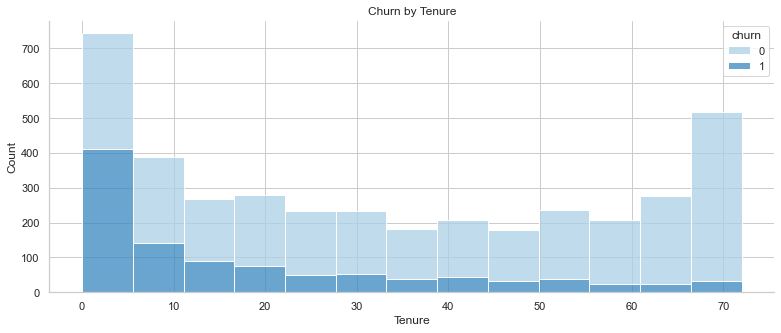

In [846]:
# Churn by Tenure 
plt.figure(figsize=(13,5))
sns.histplot(train,
             x=train.tenure,
             hue='churn',
             multiple='stack',
             palette='Blues')
plt.title("Churn by Tenure")
plt.xlabel('Tenure')


Text(0.5, 0, 'monthly_charges')

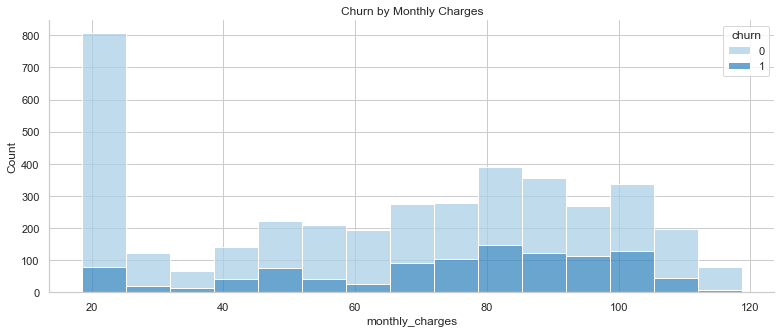

In [847]:
# Churn by Monthly Charges 
plt.figure(figsize=(13,5))
sns.histplot(train,
             x=train.monthly_charges,
             hue='churn',
             multiple='stack',
             palette='Blues')
plt.title("Churn by Monthly Charges")
plt.xlabel('monthly_charges')


Text(0.5, 0, 'total_charges')

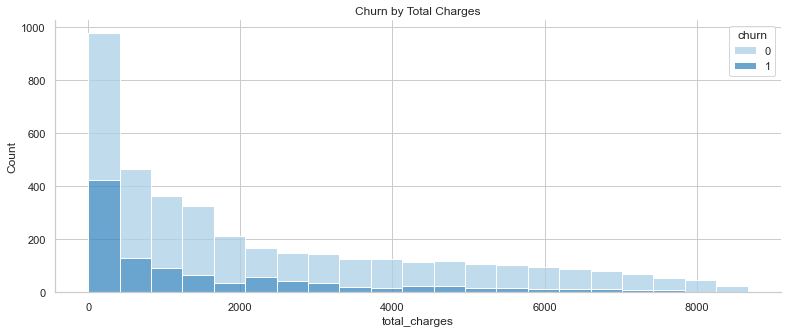

In [848]:
# Churn by Total Charges 
plt.figure(figsize=(13,5))
sns.histplot(train,
             x=train.total_charges,
             hue='churn',
             multiple='stack',
             palette='Blues')
plt.title("Churn by Total Charges")
plt.xlabel('total_charges')

***
Continuous Data Takeaways:
    
* Churn by Tenure is heavily frontloaded. 
* Churn by Monthly Charges dramatically rises after 65
* Churn by Total Charges again supports the frontloaded observation
***

#### Visualize Discrete Data

Text(0.5, 1.0, 'Churn Rate by Payment Type')

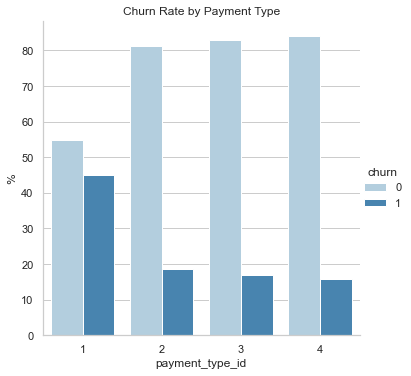

In [938]:
x,y = 'payment_type_id', 'churn'
(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('%').reset_index().pipe((sns.catplot, 'data'), x=x, y='%', hue=y, kind='bar', palette='Blues'))
plt.title('Churn Rate by Payment Type')

Text(0.5, 1.0, 'Churn Rate by Contract Type')

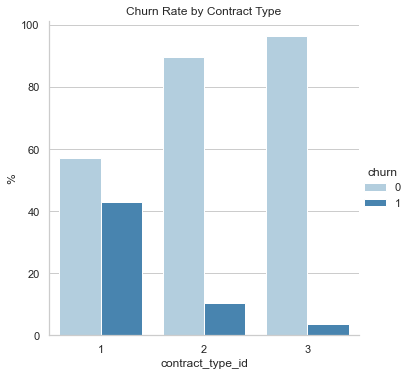

In [937]:
x,y = 'contract_type_id', 'churn'
(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('%').reset_index().pipe((sns.catplot, 'data'), x=x, y='%', hue=y, kind='bar', palette='Blues'))
plt.title('Churn Rate by Contract Type')

Text(0.5, 1.0, 'Churn Rate by Internet Service')

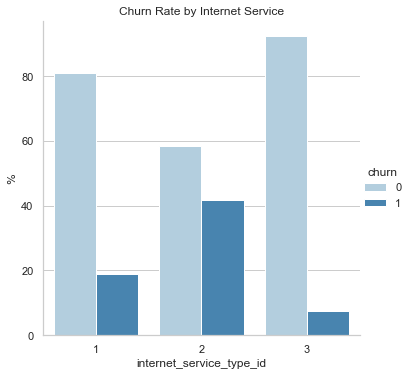

In [936]:
x,y = 'internet_service_type_id', 'churn'
(train.groupby(x)[y].value_counts(normalize=True).mul(100).rename('%').reset_index().pipe((sns.catplot, 'data'), x=x, y='%', hue=y, kind='bar', palette='Blues'))
plt.title('Churn Rate by Internet Service')

***
Mulivariate Discrete Data Takeaways:

* Payment by electronic check signficant churn driver and only one worth further exploring in payment types 
* Month-to-month contracts significatn churn driver.  1y & 2yr contracts drive loyalty.
* Fiber Optics a major churn driver while other internet service types are not drivers.

Data key:
* payment_type_id = {1:Electronic Check, 2:Mailed Check, 3:Bank Transfer(auto), 4:Credit Card (auto)
* contract_type_id = {1:month_to_month, 2:One year, 3:Two year}
* internet_service_type_id = {1:DSL, 2:Fiber Optics, 3:None}

Prelimary Insights: 

* I believe the internet service type is telling here.  I find it odd that the superior value-adding service drives more churn when compared with lower quality service and even more odd when compared to non-subscribers.  Assumption here is that price may be a factor.
* Contract length an obvious explanatory variable.  However, I'd like to explore any significant associations across all the features with contract types to see if there's some explanatory power here.
* A significant portion of all churn is occuring within the first 10-20 months.  Again, are there any associative grouping that may have some explanatory value here. 
***

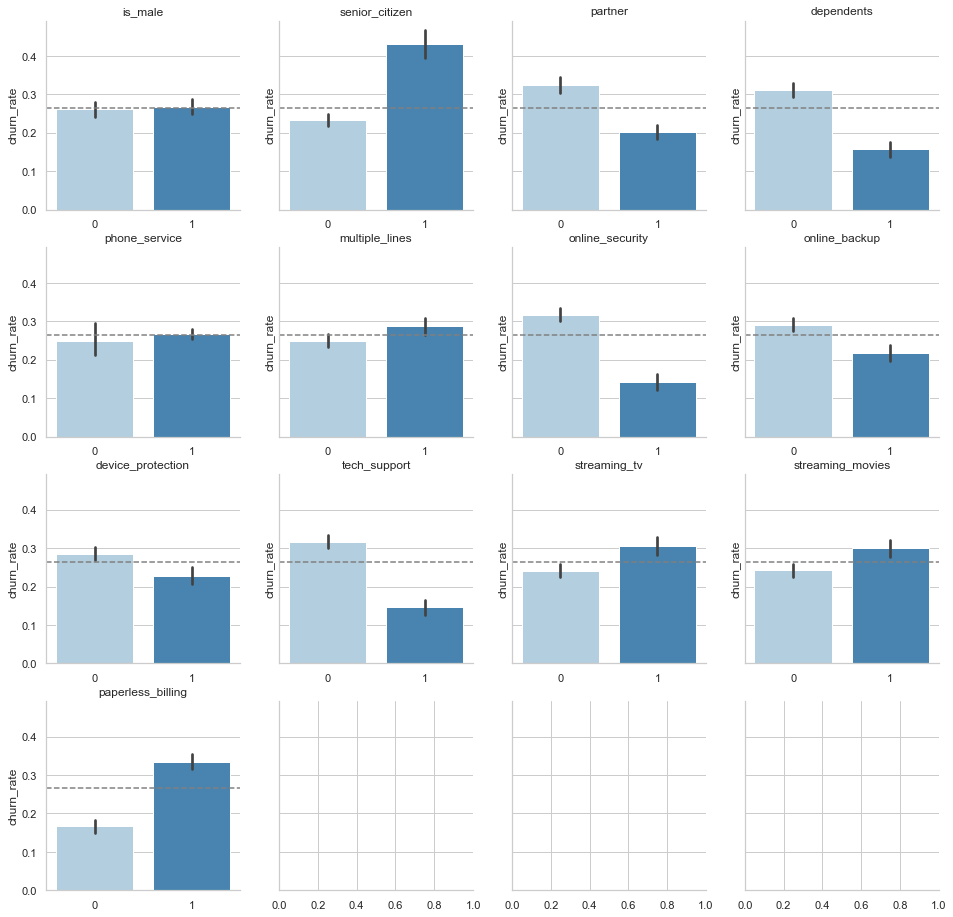

In [852]:
churn_rate = train.churn.mean()
_, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16), sharey=True)
for i, col in enumerate(disc_data):
    ax = ax.flatten()
    sns.barplot(col, train.churn, data=train, ax=ax[i], palette='Blues')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('churn_rate')
    ax[i].set_title(col)
    ax[i].axhline(churn_rate, ls='--', color='grey')

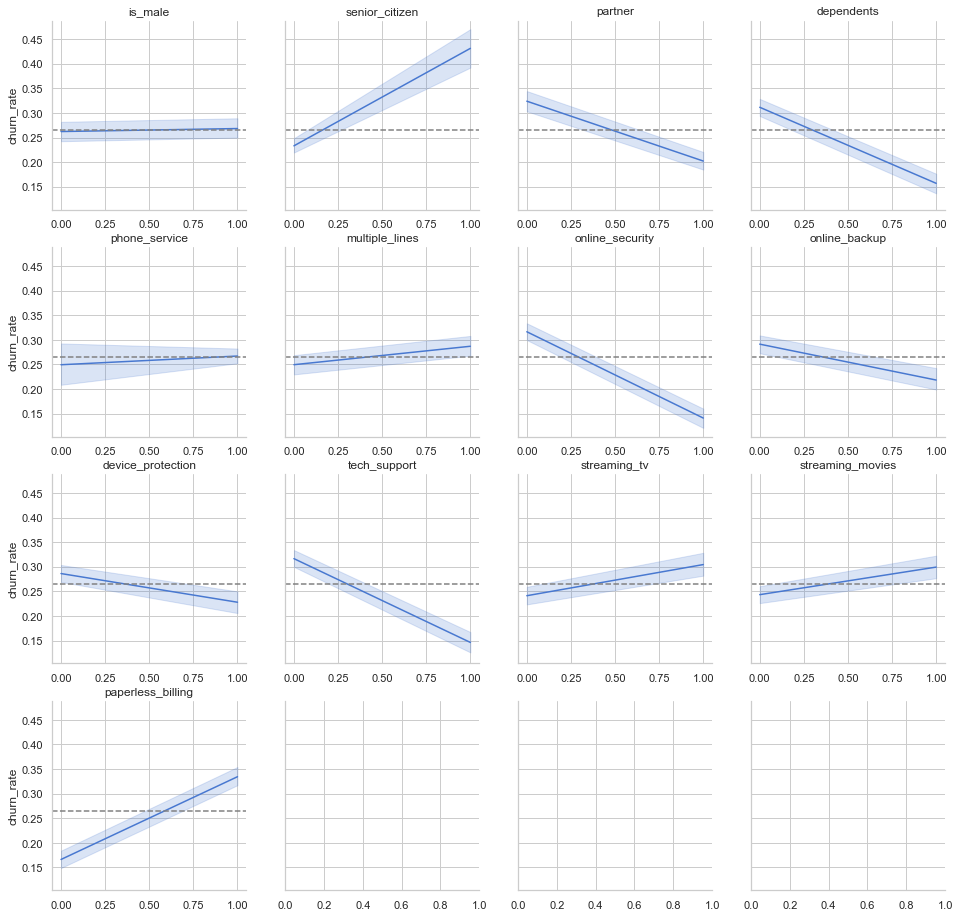

In [853]:
churn_rate = train.churn.mean()
_, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16), sharey=True)
for i, col in enumerate(disc_data):
    ax = ax.flatten()
    sns.lineplot(col, train.churn, data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('churn_rate')
    ax[i].set_title(col)
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [854]:
normal(disc_data)

1    0.510525
0    0.489475
Name: is_male, dtype: float64
**********************
0    0.837687
1    0.162313
Name: senior_citizen, dtype: float64
**********************
0    0.518387
1    0.481613
Name: partner, dtype: float64
**********************
0    0.700989
1    0.299011
Name: dependents, dtype: float64
**********************
1    0.90033
0    0.09967
Name: phone_service, dtype: float64
**********************
0    0.577479
1    0.422521
Name: multiple_lines, dtype: float64
**********************
0    0.708598
1    0.291402
Name: online_security, dtype: float64
**********************
0    0.644433
1    0.355567
Name: online_backup, dtype: float64
**********************
0    0.642658
1    0.357342
Name: device_protection, dtype: float64
**********************
0    0.699721
1    0.300279
Name: tech_support, dtype: float64
**********************
0    0.61755
1    0.38245
Name: streaming_tv, dtype: float64
**********************
0    0.605884
1    0.394116
Name: streaming_movies, dtyp

***
Binary Discrete Data Takeaways:

Note: I found the bar charts somewhat hazy to follow so I chose to also use line charts that clearly show the impact of each feature on churn.  For my personal reference I benchmarked a slope of more than 10 to be significant and worth further consideration. 
   
   * Initially worth further consideration: ['senior_citizen', 'partner', 'dependents', 'online_security', 'tech_support', 'paperless_billing']
       * ['senior_citizen', 'paperless_billing'] were siginificant "churn" drivers
       * ['partner', 'dependents', 'online_security', 'tech_support'] were significant "loyalty" drivers
   * Potentially worth consideration: Senior Citizen only 16% of the sample population
***

***
### Explore cross-feature relationships
***

#### 2nd Derivative relationship between Tenure and the other features

***
First lets explore a potential relationship between the two continous features (tenure & monthly charges)
***

Text(0.5, 0, 'tenure')

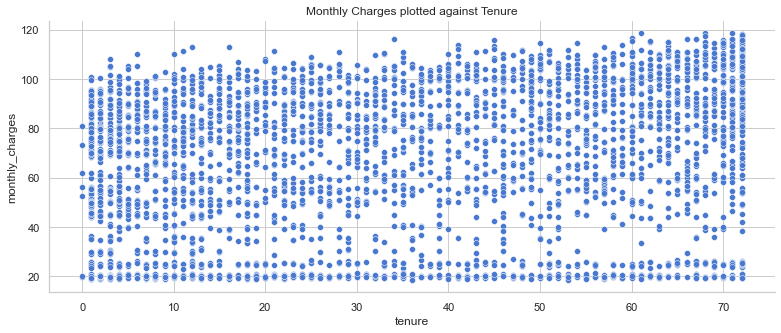

In [855]:

plt.figure(figsize=(13,5))
sns.scatterplot(
             x=train.tenure,
             y=train.monthly_charges)
plt.title('Monthly Charges plotted against Tenure')
plt.xlabel('tenure')


Key Takeaways: Nothing to see here


***
Next, lets look at potential relationship between the continuous and discrete data (tenure & others)
***

Text(0.5, 1.0, 'Relationship between Payment Type and Tenure')

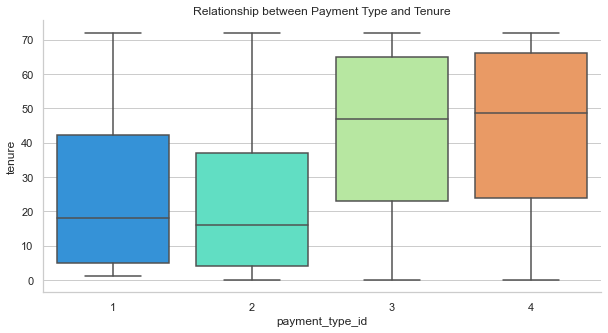

In [856]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train.payment_type_id, y=train.tenure, data=train, palette='rainbow')
plt.title('Relationship between Payment Type and Tenure')

Key Takeaway: 

* Both forms of manual payments have shorter tenures than both forms of automated payment

Text(0.5, 1.0, 'Relationship between Contract Type and Tenure')

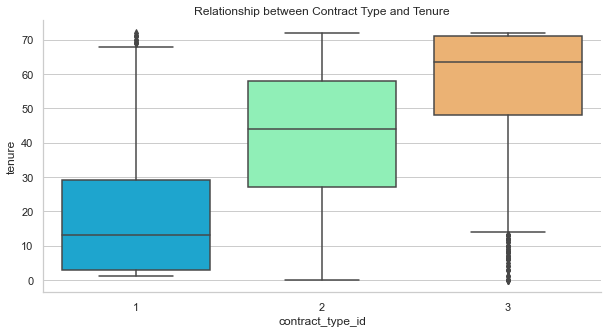

In [857]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train.contract_type_id, y=train.tenure, data=train, palette='rainbow')
plt.title('Relationship between Contract Type and Tenure')

Key Takeaway: 

* Contract length appears to be proportional to tenure with month-to-month contracts clearly showing significantly shorter tenure

Text(0.5, 1.0, 'Relationship between Internet Service Type and Tenure')

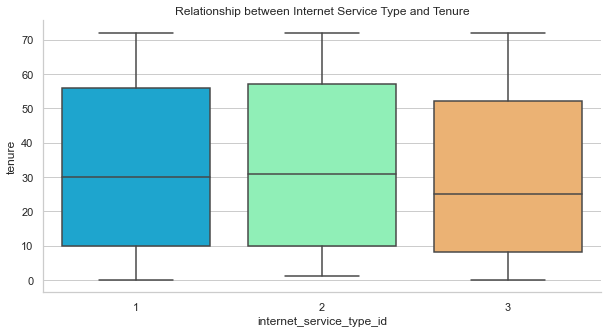

In [858]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train.internet_service_type_id, y=train.tenure, data=train, palette='rainbow')
plt.title('Relationship between Internet Service Type and Tenure')

Key Takeaway: 

* Internet Service Type does not appear to impact tenure

***
Finally let's explore relationships between tenure and the binary discrete features we identified as having a visually signification impact on churn
***

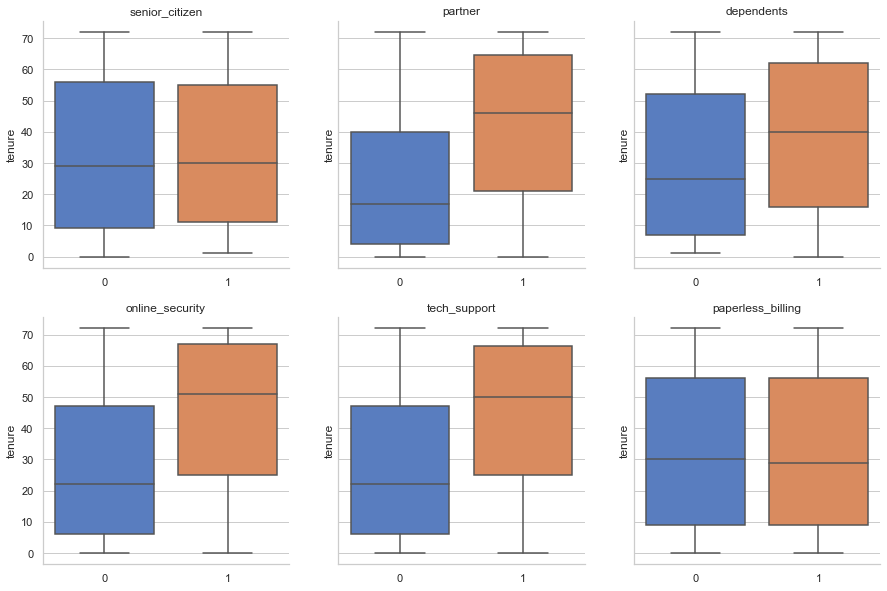

In [859]:

_, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)
for i, col in enumerate(features):
    ax = ax.flatten()
    sns.boxplot(col, train.tenure, data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('tenure')
    ax[i].set_title(col)
  

***
Binary Discrete Data Takeaways:

* Four of the six six binary data identified to influence churn continue to hold that relationship across tenure. I have identified at least four binary inputs to include in my model. ['partner', 'dependents', 'online_security', 'tech_support'] 
* paperless_billing did not appear to have any significant relationship with tenure but does have a strong relationship with churn.  I may elect to exclude this feature from my initial model scenario but intend on incorporating into additional iterations to judge the impact.
***

#### 2nd Derivative relationship between Monthly Charges and the other features

Text(0.5, 1.0, 'Relationship between Payment Type and Montly Charges')

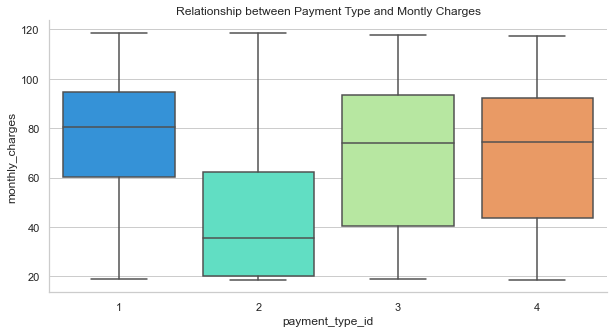

In [860]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train.payment_type_id, y=train.monthly_charges, data=train, palette='rainbow')
plt.title('Relationship between Payment Type and Montly Charges')

Key Takeaways: 

* Monthly charges are highest for electronic checks demonstrating a continuation of the churn relationship
* Mailed in checks deviate from the relationship and are the associated with the lowest monthly charges leading me to drop this as a candidate for my intiial model

Text(0.5, 1.0, 'Relationship between Contract Type and Monthly Charges')

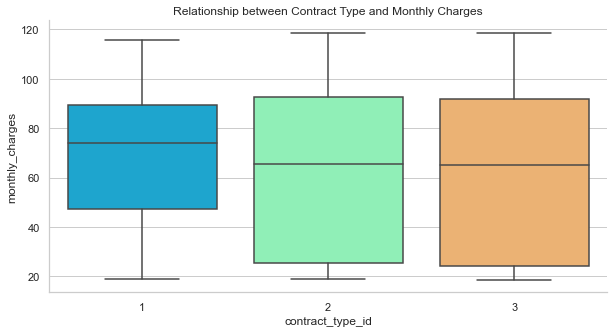

In [861]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train.contract_type_id, y=train.monthly_charges, data=train, palette='rainbow')
plt.title('Relationship between Contract Type and Monthly Charges')

Key Takeaways: 

* Monthly charges are highest for month-to-month contracts demonstrating a continuation of the churn relationship

Text(0.5, 1.0, 'Relationship between Internet Service Type and Monthly Charges')

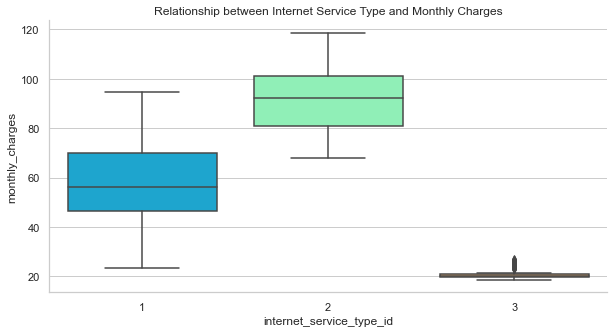

In [862]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train.internet_service_type_id, y=train.monthly_charges, data=train, palette='rainbow')
plt.title('Relationship between Internet Service Type and Monthly Charges')

Key Takeaways: 

* Monthly charges are highest for fiber-optics service demonstrating a continuation of the churn relationship

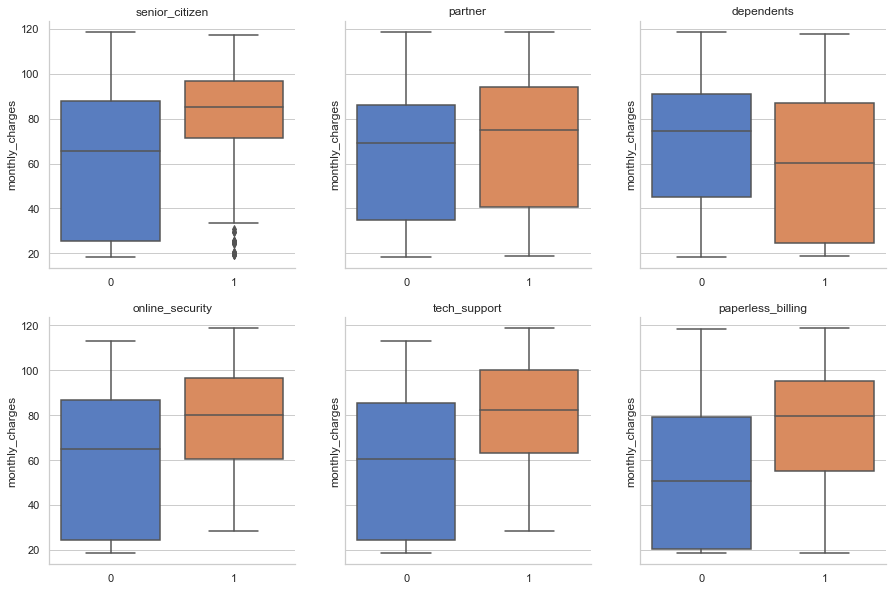

In [863]:
_, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)
for i, col in enumerate(features):
    ax = ax.flatten()
    sns.boxplot(col, train.monthly_charges, data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('monthly_charges')
    ax[i].set_title(col)
    

***
Binary Discrete Data Takeaways:
​
* Four of the six six binary features identified to influence churn continue to hold that relationship across monthly charges. I have identified at least four binary inputs to include in my model. ['partner', 'dependents', 'online_security', 'tech_support'] 
    * Interesting Note: the partner feature appears to have a bigger influence on tenure than dependents but dependents seems to lower monthly_charges to a level below the 65+ threshold where churn picks up
* Senior_citizen did associate with higher monthly charges as well.  However, while some of these Boomers were taken advantage of, there appears to be a significant amount of outliers on the opposite end of the spectrum leading me to drop this as an initial model candidate.
* When compared to monthly_charges, paperless_billing did appear to have a significant relationship.  I wrote this feature off earlier but, given the obvious relationship with monthly_charges, I now am committed to its inclusion.
***


# Hypothesis Testing

##### Focus Features vs Churn: ['tenure', 'monthly_charges', 'payment_type_id', 'contract_type_id', 'internet_service_id', 'partner', 'dependents', 'online_security', 'tech_support', 'paperless_billing']

In [864]:
from math import sqrt
from scipy import stats
import viz # curriculum visualization examples

***
T-tests: churn vs continuous
***

##### Let's test significance of monthly_charges (continous) vs churn

In [865]:
# Begin by separating the train.tenure data into churn/no_churn subgroupings

x1 = train[train.churn == 1].tenure
x2 = train[train.churn == 0].tenure

Null and alternative hypotheses based on visuals

$H_0$: there is no significant relationship between churn and tenure

$H_a$: churners have a significantly shorter tenure

Alpha = 0.05

In [866]:
# T-test and significance level
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-23.63020337421401, pvalue=1.4465811518485806e-115)

The T-Test confirms significance in the relationship between the churn and tenure data and the p-value is less than our alpha so we can reject the Null Hypothesis

##### Let's test significance of monthly_charges (continous) vs churn

In [867]:
# Begin by separating the train.tenure data into churn/no_churn subgroupings

mc1 = train[train.churn == 1].monthly_charges
mc2 = train[train.churn == 0].monthly_charges

Null and alternative hypotheses based on visuals

$H_0$: there is no significant relationship between churn and monthly_charges

$H_a$: Churners have a significantly higher average monthly_charge

Alpha = 0.05

In [868]:
# T-test and significance level
stats.ttest_ind(mc1, mc2)

Ttest_indResult(statistic=12.085323635769832, pvalue=4.8166871125684584e-33)

The T-Test confirms significance in the relationship between the churn and monthly_charges data and the p-value is less than our alpha so we can reject the Null Hypothesis

***
Chi Square tests: churn vs categorical
***

##### Let's test significance of payment_type_id (discrete) vs churn

In [869]:
# Set up observed data 
pid_obs = pd.crosstab(train.payment_type_id, train.churn)

Null and alternative hypotheses based on visuals

$H_0$: churn and payment_type_id have no association (they are independent)

$H_a$: churn and payment_type_id are associated (they are dependent)

In [870]:
# Set our alpha

alpha = 0.01

In [871]:
# run Chi Square on payment_type_id
chi2, p, degf, expected = stats.chi2_contingency(pid_obs)

print('pid_obs\n')
print(pid_obs.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

pid_obs

[[725 595]
 [725 167]
 [730 149]
 [717 135]]
---
Expected

[[969.83007862 350.16992138]
 [655.37002283 236.62997717]
 [645.81866599 233.18133401]
 [625.98123256 226.01876744]]
---

chi^2 = 352.1238
p     = 0.0000


In [872]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


##### Let's test signficance of contract_type_id (discrete) vs churn

In [873]:
# Set up observed data 
cid_obs = pd.crosstab(train.contract_type_id, train.churn)

Null and alternative hypotheses based on visuals

$H_0$: churn and contract_type_id have no association (they are independent)

$H_a$: churn and contract_type_id are associated (they are dependent)

In [874]:
# Set our alpha

alpha = 0.01

In [875]:
chi2, p, degf, expected = stats.chi2_contingency(cid_obs)

print('cid_obs\n')
print(cid_obs.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

cid_obs

[[1234  928]
 [ 723   84]
 [ 940   34]]
---
Expected

[[1588.46411362  573.53588638]
 [ 592.91884352  214.08115648]
 [ 715.61704286  258.38295714]]
---

chi^2 = 670.9607
p     = 0.0000


In [876]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


##### Let's test signficance of internet_service_type_id (discrete) vs churn

In [877]:
# Set up observed data 
isid_obs = pd.crosstab(train.internet_service_type_id, train.churn)

Null and alternative hypotheses based on visuals

$H_0$: churn and internet_service_type_id have no association (they are independent)

$H_a$: churn and internet_service_type_id are associated (they are dependent)

In [878]:
# Set our alpha

alpha = 0.01

In [879]:
chi2, p, degf, expected = stats.chi2_contingency(isid_obs)

print('isid_obs\n')
print(isid_obs.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

isid_obs

[[1106  259]
 [1016  724]
 [ 775   63]]
---
Expected

[[1002.89246766  362.10753234]
 [1278.41237636  461.58762364]
 [ 615.69515597  222.30484403]]
---

chi^2 = 398.3821
p     = 0.0000


In [880]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


##### Let's test signficance of partner (discrete) vs churn

In [881]:
# Set up observed data 
pid_obs = pd.crosstab(train.partner, train.churn)

Null and alternative hypotheses based on visuals

$H_0$: churn and partner have no association (they are independent)

$H_a$: churn and partner are associated (they are dependent)

In [882]:
# Set our alpha

alpha = 0.01

In [883]:
chi2, p, degf, expected = stats.chi2_contingency(pid_obs)

print('pid_obs\n')
print(pid_obs.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

pid_obs

[[1382  662]
 [1515  384]]
---
Expected

[[1501.76718235  542.23281765]
 [1395.23281765  503.76718235]]
---

chi^2 = 74.1372
p     = 0.0000


In [884]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


##### Let's test signficance of dependents (discrete) vs churn

In [885]:
# Set up observed data 
did_obs = pd.crosstab(train.dependents, train.churn)

Null and alternative hypotheses based on visuals

$H_0$: churn and dependents have no association (they are independent)

$H_a$: churn and dependents are associated (they are dependent)

In [886]:
# Set our alpha

alpha = 0.01

In [887]:
chi2, p, degf, expected = stats.chi2_contingency(did_obs)

print('did_obs\n')
print(did_obs.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

did_obs

[[1903  861]
 [ 994  185]]
---
Expected

[[2030.76540705  733.23459295]
 [ 866.23459295  312.76540705]]
---

chi^2 = 100.5470
p     = 0.0000


In [888]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


##### Let's test signficance of online_security (discrete) vs churn

In [889]:
# Set up observed data 
os_obs = pd.crosstab(train.online_security, train.churn)

Null and alternative hypotheses based on visuals

$H_0$: churn and online_security have no association (they are independent)

$H_a$: churn and online_security are associated (they are dependent)

In [890]:
# Set our alpha

alpha = 0.01

In [891]:
chi2, p, degf, expected = stats.chi2_contingency(os_obs)

print('os_obs\n')
print(os_obs.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

os_obs

[[1910  884]
 [ 987  162]]
---
Expected

[[2052.80699975  741.19300025]
 [ 844.19300025  304.80699975]]
---

chi^2 = 127.6163
p     = 0.0000


In [892]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


##### Let's test signficance of tech_support (discrete) vs churn

In [893]:
# Set up observed data 
ts_obs = pd.crosstab(train.tech_support, train.churn)

Null and alternative hypotheses based on visuals

$H_0$: churn and tech_support have no association (they are independent)

$H_a$: churn and tech_support are associated (they are dependent)

In [894]:
# Set our alpha

alpha = 0.01

In [895]:
chi2, p, degf, expected = stats.chi2_contingency(ts_obs)

print('ts_obs\n')
print(ts_obs.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

ts_obs

[[1886  873]
 [1011  173]]
---
Expected

[[2027.09180827  731.90819173]
 [ 869.90819173  314.09180827]]
---

chi^2 = 122.4100
p     = 0.0000


In [896]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


##### Let's test signficance of paperless_billing (discrete) vs churn

In [897]:
# Set up observed data 
pb_obs = pd.crosstab(train.paperless_billing, train.churn)

Null and alternative hypotheses based on visuals

$H_0$: churn and paperless_billing have no association (they are independent)

$H_a$: churn and paperless_billing are associated (they are dependent)

In [898]:
# Set our alpha

alpha = 0.01

In [899]:
chi2, p, degf, expected = stats.chi2_contingency(pb_obs)

print('pb_obs\n')
print(pb_obs.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

pb_obs

[[1350  269]
 [1547  777]]
---
Expected

[[1189.51128582  429.48871418]
 [1707.48871418  616.51128582]]
---

chi^2 = 137.6245
p     = 0.0000


In [900]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


***
#### All features identified in Exploration pass the statistical tests for model inclusion
***

# Model Construction

#### Revisit data and perform any necessary additional manipulation

Does prep_df meet the 3 criteria of "tidy data"

* Each feature must have its own column
* Each observation must have its own row.
* Each value must have its own cell.

Assessment:  I would consider the data "tidy". The ['payment_type_id', 'internet_service_type_id', 'contract_type_id'] features could be pivoted into separate featuress as each numeric value represents a seperate  sub-group.  However, for the purposes of our modelling, each observation for the sub-groups has its own separate row and relevance under the column grouping.  Note: a pivot may be help fine tune our selected model.

#### I decided to narrow the noise and train my models on the most relevant features identified above.  So I need to take my prep_df, drop all the columns not in my selection and then split this df into train, validate, test.

In [901]:
# Drop unwanted features from prep_df and create our train, validate, test from this df
model_var = ['churn', 'tenure', 'monthly_charges', 'payment_type_id', 'contract_type_id', 'internet_service_id', 'partner', 'dependents', 'online_security', 'tech_support', 'paperless_billing']

model_df = pd.DataFrame(prep_df, columns=['churn', 'tenure', 'monthly_charges', 'payment_type_id', 'contract_type_id', 'internet_service_type_id', 'partner', 'dependents', 'online_security', 'tech_support', 'paperless_billing'])

In [902]:
# Split the model_df
train, validate, test = prepare.telco_split(model_df)

In [903]:
# create X & y version of train, where y is a series with just the target feature and X are all the features. 

X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

#### The three models I have elected to use are the Decision Tree, Random Forest and Logistic Regression Models

##### Establish Baseline to measure models against

In [904]:
baseline = prep_df.churn.value_counts().nlargest(1) / len(prep_df.churn)
print(f'My baseline accuracy is {round(baseline.values[0] * 100,2)}%.')

My baseline accuracy is 73.46%.


***
Decision Tree
***

In [905]:
# Imports
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [1033]:
# Set Decision Tree hyperparameters
clf = DecisionTreeClassifier(max_depth=7, random_state=123)

In [1034]:
# Fit the random forest algorithm to the training data.
clf = clf.fit(X_train, y_train)

In [999]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)

In [1000]:
# Feature importance
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.99180328, 0.00819672],
       [0.84375   , 0.15625   ],
       [0.25      , 0.75      ],
       ...,
       [0.76404494, 0.23595506],
       [0.76404494, 0.23595506],
       [0.62666667, 0.37333333]])

In [1001]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


In [1002]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2897
           1       0.68      0.62      0.65      1046

    accuracy                           0.82      3943
   macro avg       0.78      0.76      0.76      3943
weighted avg       0.82      0.82      0.82      3943



In [995]:
print('Accuracy of Decision Tree classifier on Validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on Validate set: 0.78


In [1003]:
# Produce y_predictions that come from the X_validate
y_predv = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_predv))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1242
           1       0.60      0.56      0.58       449

    accuracy                           0.78      1691
   macro avg       0.72      0.71      0.71      1691
weighted avg       0.78      0.78      0.78      1691



##### <div class="alert alert-block alert-success">The Decision Tree model performance on both the Train and on the Validate are close enough to suggest the model is not over fit.</div>

***
Random Forest
***

In [914]:
# imports

from sklearn.ensemble import RandomForestClassifier

In [1020]:
# Set Random Forest hyperparameters
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=10,
                            n_estimators=10,
                            max_depth=3, 
                            random_state=123)

In [1021]:
# Fit the model to the Train data
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=10,
                       random_state=123)

In [1022]:
# Feature importance as determined by model
print(rf.feature_importances_)

[0.15433128 0.12829023 0.19562614 0.36847584 0.06339321 0.01427585
 0.00194405 0.02848771 0.03319431 0.01198138]


In [1023]:
# Make predictions
y_pred_rf = rf.predict(X_train)

In [1024]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.80


In [1025]:
# Classification report
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2897
           1       0.71      0.38      0.50      1046

    accuracy                           0.80      3943
   macro avg       0.76      0.66      0.68      3943
weighted avg       0.78      0.80      0.77      3943



In [1026]:
# Compute the accuracy of the model when run on the validate dataset.

print('Accuracy of random forest classifier on Validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on Validate set: 0.79


In [1027]:
# Produce y_predictions that come from the X_validate
y_pred_rfv = rf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred_rfv))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1242
           1       0.70      0.37      0.49       449

    accuracy                           0.79      1691
   macro avg       0.75      0.66      0.68      1691
weighted avg       0.78      0.79      0.77      1691



##### <div class="alert alert-block alert-success">The Random Forest model performs just as well on the Validate set as it did on the Train. </div>

***
Logistic Regression
***

In [923]:
# imports
from sklearn.linear_model import LogisticRegression

In [924]:
# Set logit hyperparameters
logit = LogisticRegression(C=1, class_weight={0:1, 1:1}, random_state=123, intercept_scaling=True, solver='lbfgs')

In [925]:
# Fit the model
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 1}, intercept_scaling=True,
                   random_state=123)

In [926]:
# Feature importance
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.03207236  0.02715592 -0.1336457  -0.69570829 -0.1983828   0.06989462
  -0.22298605 -0.61098039 -0.64178491  0.35451692]]
Intercept: 
 [-0.26300623]


In [927]:
# Make Predictions
y_predlog = logit.predict(X_train)

In [928]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.80


In [929]:
# Classification report
print(classification_report(y_train, y_predlog))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2897
           1       0.65      0.54      0.59      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.72      0.73      3943
weighted avg       0.79      0.80      0.79      3943



In [930]:
# Compute the accuracy of the model when run on the validate dataset.

print('Accuracy of random forest classifier on Validate set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))

Accuracy of random forest classifier on Validate set: 0.80


In [1028]:
# Produce y_predictions that come from the X_validate
y_predlog_v = logit.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_predlog_v))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1242
           1       0.64      0.51      0.57       449

    accuracy                           0.80      1691
   macro avg       0.74      0.70      0.72      1691
weighted avg       0.78      0.80      0.79      1691



##### <div class="alert alert-block alert-success">The Random Forest model performs just as well on the Validate set as it did on the Train.</div>

In [1053]:
# Compare classification reports across all 3 models
print(classification_report(y_validate, y_predv))
print(classification_report(y_validate, y_pred_rfv))
print(classification_report(y_validate, y_predlog_v))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1242
           1       0.60      0.56      0.58       449

    accuracy                           0.78      1691
   macro avg       0.72      0.71      0.71      1691
weighted avg       0.78      0.78      0.78      1691

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1242
           1       0.70      0.37      0.49       449

    accuracy                           0.79      1691
   macro avg       0.75      0.66      0.68      1691
weighted avg       0.78      0.79      0.77      1691

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1242
           1       0.64      0.51      0.57       449

    accuracy                           0.80      1691
   macro avg       0.74      0.70      0.72      1691
weighted avg       0.78      0.80      0.79      1691



#### Model Selection

All three of my models hovered around the 80% accuracy rate.  Considering the Baseline threshold of ~74%, all three models provide some predictive value and appear to be fairly equivalent.  

However, the goal of the project was to detect Churn candidates and taking that into consideration it isn't enough to just be accurate.  I have to further evaluate the models on their ability to capture as much of the Churn potential as possible.  For this I relied on the Recall stats and here there is a clear winner.  The Random Forest model was an obvious underperformer here with recall score of 37%.  There is value in potentially capturing these "churners" but when considering there are costs associated with recommending actions based on the model's predictions, there's a business need to maximize the reach of every dollar spent.   

Switching focus on the my Decision Tree and Logistical Regression models, we get similar perfomance metrics making the decision a little less obvious.  My Logistic Regression model score is slightly more accurate but my Decision Tree model slightly outperforms on the Recall score.  From a cost benefit perspective, I believe the decision should fall on the model that better identifies positive churners when given relatively equal accuracy scores and, therefore, elect to utilize my Decision Tree model. 


***
Model Test
***

In [1032]:
# Run the Decision Tree model on the test data

In [1035]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.79


In [1036]:
# Produce y_predictions that come from the X_test
y_predt = clf.predict(X_test)

# Compare actual y values (from test) to predicted y_values from the model run on X_test
print(classification_report(y_test, y_predt))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.60      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409




<div class="alert alert-block alert-success">Test results:  the recall and accuracy scores are in line with the test and validate results suggesting the model is nor over fit.  In fact, the Recall and Accuracy slightly improve which is supports the model selection.</div>


# Recommendations

During the exploration phase, I found two dynamics to be very interesting. 
* The first was the clear bias of customers to churn during the first 6 months.  
* The second, was the rate at which churn accelerated after monthly charges rose above $65. 

In my opinion, the focus of any recommendation should be on maximizing retention within the first 6 months and that the focus of any recommendations should be cognizant of the monthly charge driver.  

My initial assumption was that this frontloaded churn was indicative of immediate customer dissatisfaction with services (buyers remorse) which would have led me to focus more on the services provided during my exploration.  However, the tenure data also shows that customer "loyalty" is very high and, that after the first six months, churn rates significantly decline to levels that could be considered acceptable.  In my opinion, this suggests that customer satisfaction with services provided is not the primary driver.  

Considering this binary profile, I decided to focus on exploring the relationships between the tenure and monthly charges data and the other data features.  There was a clear association between certain features across both of these leading me to believe that any recommendations should be focused on bridging the 6 month threshold by addressing the cost structure.  

It is my belief that while tenure is definitely associated with churn, it is more of a correlation and that causation more likely lies in the monthly charges.  I believe the exploratory data findings supports this and therefore would recommend the following:

* I would not currently recommend changing the actual cost structures on services

* A reduction in upfront cost structures for services targeting the $65 threshold by offering:
    * Initial discounts:
        * on service contracts 1 year and above
        * for subscribing to high cost services like Fiber Optics
    * Service hooks:
        * use promotional services (e.g. free streaming subscriptions, etc.) to drive customers towards the premium services
 
On its face, these recommendations would appear to be counter-intuitive, but the data suggests high long-term user satisfaction.  Again, I'd like to reiterate that the data suggest the churn impact of current costs structures are bottlenecked in the first 6 month and that user behavior beyond this horizon suggest the current platform is a long term "loyalty" driver.  Considering this, the primary goal of any recommendations should be focused on overcoming the intial cost-structure shock and increase user/service interaction.   

Additionally, I would note that the Senior Citizen data seemed anamolous.  The fact that these customers were being charged more on average and at the same time had a significant amount of outliers at the opposite cost spectrum was a "red-flag".  I eliminated this data set from my model but took away the fact that it is highly likely these customers are being mis-profiled during subscription intiation.  Taking this into consideration, it wouldn't be illogical to assume the same is occuring across all customer profiles and that churn could also be potentially reduced by## Next Steps training representatives to better profile potential customers.

* On this front, I would recommend providing anonymous online and in-store survey options for customers to provide feedback on the service they received at sign up.  This may provide data that could allow us to further explore the potential mismatch between customer demand and services provided and the resulting impact on churn



## Next Steps

Note: Earlier in the Exploration phase, there were 3 features that had multiple sub-groupings. Within these sub-groupings, there were elements that appeared more significant to churn than the rest of the group.

In order to try and improve on my model metrics, I would isolate these, drop the others from the group and adjust my features in the train, validate and test dfs.

## Potential Further exploration

Given the my takeaway from the Senior Citizen data, if given the opportunity, I'd like to gather more data on the signup process.  I believe the anamolous senior citizen data is can be explained by poor customrer profilig and would like to explore this further.  Not only within this group but across the entire customer spectrum.  Perhaps, there are available complaints, customer surveys, etc. that could shed some light inot not only the sign up process but customer reaction.

#### Create .csv file containing customer ids, model probabilities and predictions

In [1047]:
# Concat the train, validate & test dfs and reconstitute all observations
csv_pred = pd.concat([train, validate, test], axis = 0)

In [1048]:
# Separate concatenated df X & y
csv_pred_X = csv_pred.drop(columns=['churn'])
csv_pred_y = csv_pred.churn

In [1049]:
# Run predictions
predictions = pd.DataFrame({'churn_prediction': clf.predict(csv_pred_X)})

In [1050]:
# Calculate probabilities
churn_probability = pd.DataFrame({'churn_probability': clf.predict_proba(csv_pred_X)[:,1]})

In [1051]:
# Concat customer_ids, probabilities and predictions into one df
customer_ids = telco_df['customer_id']
columns = [customer_ids, churn_probability, predictions]
churn_predictions = pd.concat(columns, axis=1)


In [1052]:
# convert predictions dataframe to .csv file and save in directory
churn_predictions.to_csv('model_predictions.csv')